In [2]:
import pandas as pd
from ams_utilities import *
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
sns.set_style('white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [10]:
normal=pd.DataFrame(pd.read_csv(r'E:\Jake\morphology_k-means_clusters.csv',index_col=0).iloc[:,0])
reduced=pd.DataFrame(pd.read_csv(r'E:\Jake\morphology_k-means_clusters_reduced.csv',index_col=0).iloc[:,0])
inliers=pd.DataFrame(pd.read_csv(r'E:\Jake\morphology_k-means_clusters_noOutliers.csv',index_col=0).iloc[:,0])
#noPCA=pd.DataFrame(pd.read_csv(r'\E:\Jake\morphology_k-means_clusters_noPCA.csv',index_col=0).iloc[:,0])
#I am happy that all clusters '0' are basically the same, so these differences are meaningful

In [12]:
df=pd.concat([normal,reduced,inliers],axis=1, join='outer', sort=True)
df.columns=['Normal', 'Reduced', 'No Outliers']#, 'No PCA']
df

df=df.drop(['Reduced'], axis=1)
same=[]
for count,i in enumerate(df.sum(axis=1)):
    if i==0 or i==3:
        same.append('True')
    elif i==2 and np.isnan(df.iat[count,1])==True:
        same.append('True')
    else:
        same.append('False')
df['Identity?']=same
df

,Normal,No Outliers,Identity?
AS016: Cell01,0.0,0.0,True
AS016: Cell02,0.0,0.0,True
AS029: Cell01,1.0,1.0,False
AS030: Cell01,0.0,0.0,True
AS036: Cell01,0.0,0.0,True
AS038: Cell01,0.0,0.0,True
AS039: Cell01,0.0,0.0,True
AS039: Cell02,NaN,NaN,True
AS040: Cell01,0.0,NaN,True
AS045: Cell01,0.0,0.0,True


In [13]:
switchers=[]
for count,i in enumerate(df.loc[:,'Identity?']):
    if i == 'False':
        switchers.append(df.index[count])
switchers

['AS029: Cell01',
 'AS049: Cell01',
 'AS056: Cell03',
 'AS057: Cell01',
 'AS057: Cell02',
 'AS059: Cell01',
 'AS059: Cell02',
 'AS059: Cell03',
 'AS059: Cell04',
 'AS060: Cell04',
 'AS062: Cell02',
 'AS063: Cell01',
 'AS069: Cell03',
 'AS071: Cell01',
 'AS072: Cell01',
 'AS072: Cell03',
 'AS087: Cell01',
 'AS087: Cell02',
 'AS091: Cell04',
 'AS108: Cell01',
 'AS109: Cell01',
 'AS109: Cell03',
 'AS114: Cell01',
 'AS114: Cell02',
 'AS115: Cell01',
 'AS116: Cell01',
 'AS116: Cell02',
 'AS152: Cell01']

In [14]:
df_pca=pd.read_csv('E:\Jake\morph_PCA.csv',index_col=0)
df_pca

,AS016: Cell01,AS016: Cell02,AS029: Cell01,AS030: Cell01,AS036: Cell01,AS038: Cell01,AS039: Cell01,AS040: Cell01,AS045: Cell01,AS049: Cell01,...,AS109: Cell03,AS113: Cell02,AS114: Cell01,AS114: Cell02,AS114: Cell03,AS115: Cell01,AS116: Cell01,AS116: Cell02,AS117: Cell04,AS152: Cell01
PC1,-0.567907,-0.202542,0.483353,-0.548455,-0.397145,-0.246806,-0.569557,-0.388272,-0.263047,0.003962,...,0.063690,-0.273670,0.013898,0.188875,-0.331452,0.452257,0.108478,0.148167,-0.042529,1.320770
PC2,0.084267,-0.101400,-0.175965,0.007763,0.130719,0.074672,0.097991,-0.048652,-0.134929,-0.043913,...,-0.193138,-0.133119,-0.001266,0.148658,0.058474,0.428159,-0.097618,-0.165842,0.382688,-0.237574


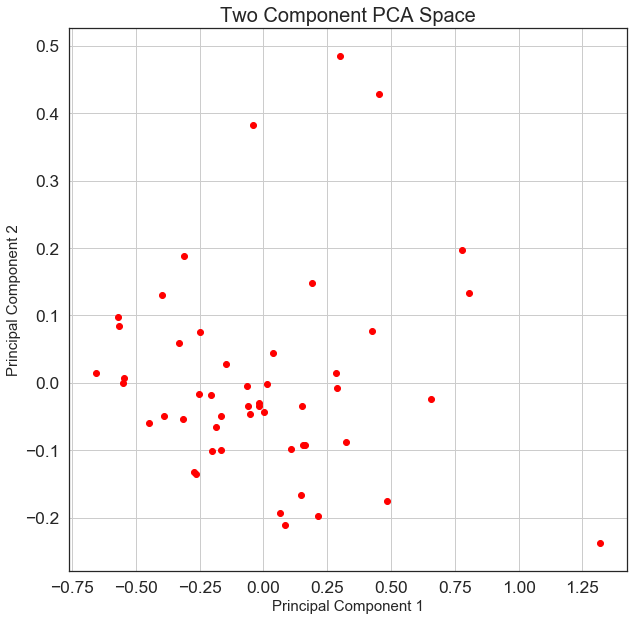

In [15]:
PC1=np.array(df_pca.loc['PC1'])
PC2=np.array(df_pca.loc['PC2'])
labs=[]
for i in range(0,len(df_pca.columns)):
    labs.append(df_pca.columns[i])
labels = labs

fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(PC1, PC2, color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two Component PCA Space', fontsize = 20)

# for i,type in enumerate(labels):
    
#     x = PC1[i]
#     y = PC2[i]
#     plt.text(x+0.003, y+0.003, type, fontsize=9)
    
ax.grid()
plt.savefig('E:\Jake\Morph_PCA')

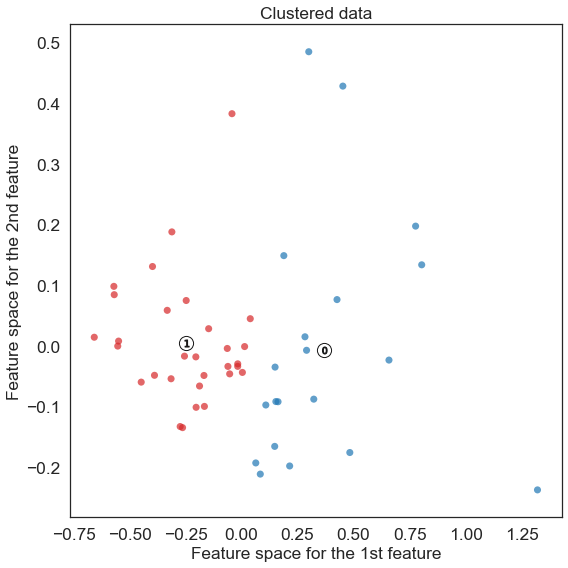

In [19]:


#K means clustering, n_clusters = 3
X = np.column_stack((PC1,PC2))

fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(8, 8)


clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(X)

colors = cm.tab10(cluster_labels.astype(float) / 3)
ax1.scatter(X[:, 0], X[:, 1], marker='.', s=200, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

centers = clusterer.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax1.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax1.set_title("Clustered data")
ax1.set_xlabel("Feature space for the 1st feature")
ax1.set_ylabel("Feature space for the 2nd feature")
fig.tight_layout()
plt.savefig('E:\Jake\morph_K-means_n=2')